#### Data Preprocessing

In [1]:
fldr="Data/UTKFace"

In [2]:
import os
files=os.listdir(fldr)
print(int(files[0].split('_')[0]))
print(files[0])

100
100_0_0_20170112213500903.jpg.chip.jpg


In [3]:
import cv2
ages=[]
genders=[]
images=[]

for i, fle in enumerate(files):
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  total=fldr+'/'+fle
  image=cv2.imread(total)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(48,48))
  images.append(image)
#   if i % 1000 == 0:
#     print(i)

In [4]:
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)

In [5]:
# from google.colab.patches import cv2_imshow
# cv2_imshow(images[24])

In [5]:
print(ages[24])
print(genders[24])

10
0


In [7]:
# cv2_imshow(images[53])

In [6]:
print(ages[53])
print(genders[53])

10
0


In [7]:
import numpy as np
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)

In [8]:
np.save('Data/image.npy',images_f)
np.save('Data/gender.npy',genders_f)
np.save('Data/age.npy',ages_f)

In [9]:
import numpy as np

images_f =  np.load('Data/image.npy')
genders_f = np.load('Data/gender.npy')
ages_f =    np.load('Data/age.npy')

Male = 0
Female= 1

In [10]:
values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


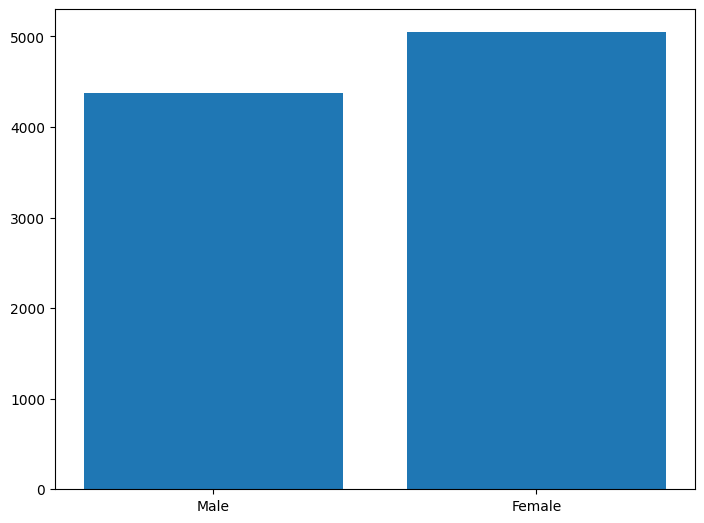

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=[4372,5047]
ax.bar(gender,values)
plt.show()

In [12]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [13]:
val=values.tolist()
cnt=counts.tolist()

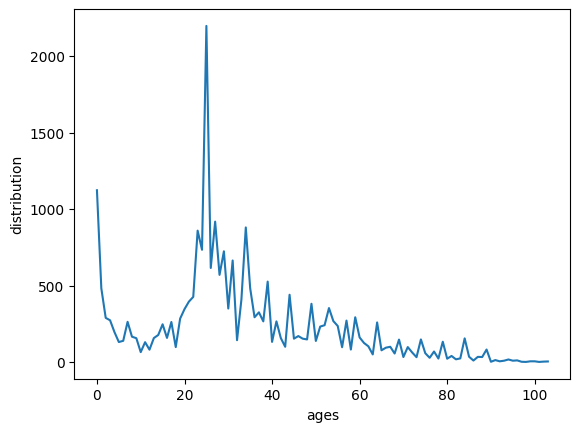

In [14]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

In [15]:
labels=[]

i=0
while i<len(ages):
  label=[]
  label.append([ages[i]])
  label.append([genders[i]])
  labels.append(label)
  i+=1

In [16]:
images_f_2=images_f/255
labels_f=np.array(labels)
images_f_2.shape

(23708, 48, 48, 3)

In [17]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.25)

In [19]:
Y_train[0:5]

array([[[25],
        [ 1]],

       [[40],
        [ 0]],

       [[15],
        [ 0]],

       [[50],
        [ 0]],

       [[ 5],
        [ 1]]])

In [20]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [21]:
Y_train_2[0][0:5]

array([[1],
       [0],
       [0],
       [0],
       [1]])

In [22]:
Y_train_2[1][0:5]

array([[25],
       [40],
       [15],
       [50],
       [ 5]])

### Model

In [24]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x
def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense_1= Dense(64,activation='relu')(flatten)
  dense_2= Dense(64,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)
  output_2= Dense(1,activation="relu",name='age_out')(drop_2)
  model = Model(inputs=[inputs], outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",
	metrics=["accuracy"])
  
  return model


In [25]:
Model=model((48,48,3))

In [26]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 32)   896         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 48, 48, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 48, 48, 32)   0           ['dropout[0][0]']                
                                                                                              

#### Training

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [28]:
fle_s='Age_sex_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [29]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=100,callbacks=[callback_list])

2021-10-31 02:34:58.480570: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-10-31 02:35:00.280119: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


278/278 [==============================] - 11s 15ms/step - loss: 16.9244 - sex_out_loss: 0.6679 - age_out_loss: 16.0676 - sex_out_accuracy: 0.5880 - age_out_accuracy: 0.0477 - val_loss: 19.1245 - val_sex_out_loss: 0.6157 - val_age_out_loss: 18.3286 - val_sex_out_accuracy: 0.6727 - val_age_out_accuracy: 0.0462

Epoch 00001: val_loss improved from inf to 19.12452, saving model to Age_sex_detection.h5
Epoch 2/100
278/278 [==============================] - 3s 10ms/step - loss: 12.8495 - sex_out_loss: 0.5538 - age_out_loss: 12.0746 - sex_out_accuracy: 0.7221 - age_out_accuracy: 0.0459 - val_loss: 14.5233 - val_sex_out_loss: 0.5001 - val_age_out_loss: 13.7689 - val_sex_out_accuracy: 0.7672 - val_age_out_accuracy: 0.0336

Epoch 00002: val_loss improved from 19.12452 to 14.52329, saving model to Age_sex_detection.h5
Epoch 3/100
278/278 [==============================] - 3s 10ms/step - loss: 10.8996 - sex_out_loss: 0.4844 - age_out_loss: 10.1427 - sex_out_accuracy: 0.7638 - age_out_accuracy: 0.

### Evaluation

In [29]:
from tensorflow.keras.models import Model, load_model

Model = load_model('Age_sex_detection.h5')
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 16s 76ms/step - loss: 5.4499 - sex_out_loss: 0.1632 - age_out_loss: 4.2898 - sex_out_accuracy: 0.9327 - age_out_accuracy: 0.0467


[5.44992208480835,
 0.16318996250629425,
 4.28981351852417,
 0.9326809644699097,
 0.04673527926206589]

In [30]:
pred=Model.predict(X_test)

186/186 [==============================] - 14s 75ms/step


In [31]:
pred[1]

array([[33.000305],
       [22.866644],
       [45.904503],
       ...,
       [38.312866],
       [48.600952],
       [19.70659 ]], dtype=float32)

In [40]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

NameError: name 'History' is not defined

### For Gender

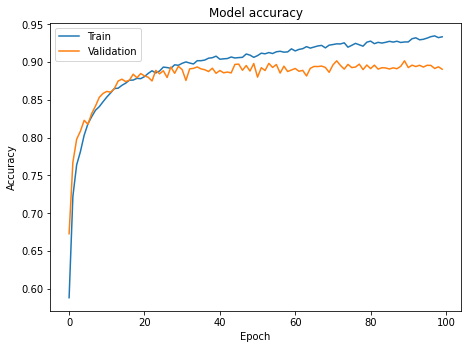

In [34]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

### For age

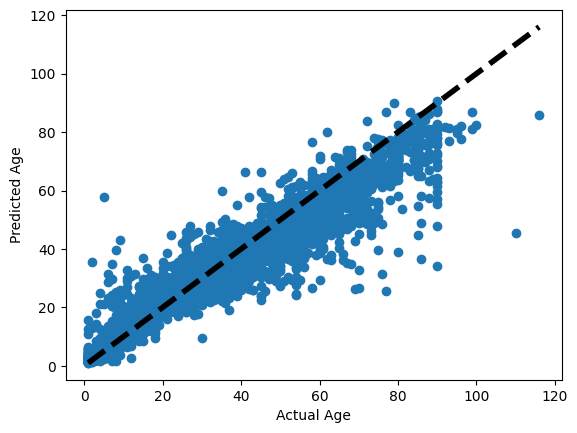

In [32]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

#### For Gender

In [33]:
i=0
Pred_l=[]
while(i<len(pred[0])):

  Pred_l.append(int(np.round(pred[0][i])))
  i+=1


In [34]:
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report 

In [35]:

report=classification_report(Y_test_2[0], Pred_l)

In [36]:
print(report)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3117
           1       0.93      0.92      0.93      2810

    accuracy                           0.93      5927
   macro avg       0.93      0.93      0.93      5927
weighted avg       0.93      0.93      0.93      5927



In [43]:
from metrics import* 

In [47]:

results = macro_accuracy(Y_test_2[0], Pred_l)
results


0.9322457377006133

In [50]:
macro_f1(Y_test_2[0], Pred_l,[0,1])

0.932463909159451

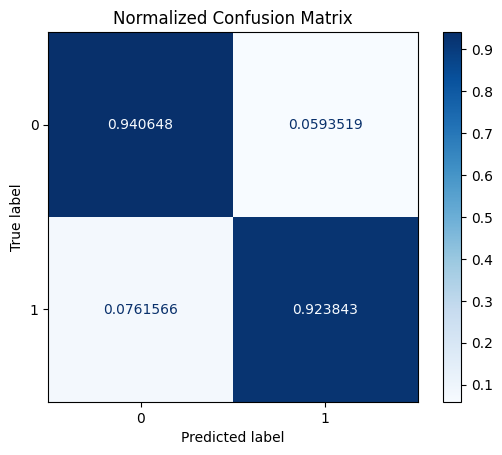

array([[0.94064806, 0.05935194],
       [0.07615658, 0.92384342]])

In [51]:
confusion_matrix(Y_test_2[0], Pred_l,[0,1])

In [52]:
compute_TP_FP_FN_TN(Y_test_2[0], Pred_l,[0,1])

{0: {'tp': 0.9406480590311197,
  'fp': 0.0761565836298932,
  'fn': 0.0593519409688803,
  'tn': 0.9238434163701068},
 1: {'tp': 0.9238434163701068,
  'fp': 0.0593519409688803,
  'fn': 0.0761565836298932,
  'tn': 0.9406480590311197}}

In [55]:
tpr(Y_test_2[0], Pred_l,[0,1])

{0: 0.9406480590311197, 1: 0.9238434163701068}

In [56]:
fpr(Y_test_2[0], Pred_l,[0,1])

{0: 0.0761565836298932, 1: 0.0593519409688803}

In [42]:
def test_image(ind,images_f,images_f_2,Model):
#   cv2_imshow(images_f[ind])
  plt.imshow(images_f[ind])
  image_test=images_f_2[ind]
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  sex_f=['Male','Female']
  age=int(np.round(pred_1[1][0]))
  sex=int(np.round(pred_1[0][0]))
  print("Predicted Age: "+ str(age))
  print("Predicted Sex: "+ sex_f[sex])


Predicted Age: 20
Predicted Sex: Female


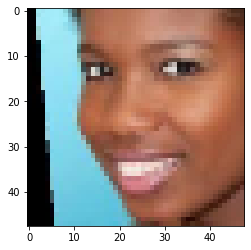

In [43]:
test_image(57,images_f,images_f_2,Model)

Predicted Age: 48
Predicted Sex: Male


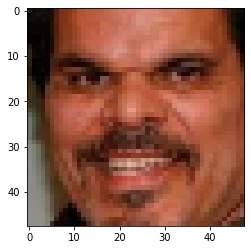

In [44]:
test_image(137,images_f,images_f_2,Model)

Predicted Age: 38
Predicted Sex: Male


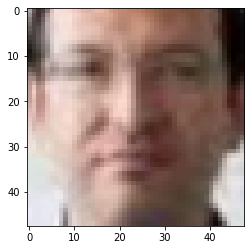

In [45]:
test_image(502,images_f,images_f_2,Model)

Predicted Age: 35
Predicted Sex: Male


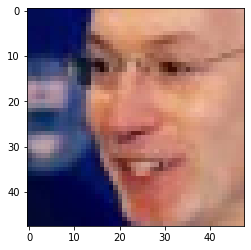

In [46]:
test_image(24,images_f,images_f_2,Model)